In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

Cargamos el archivo definido para el análisis

In [3]:
# Abrir con index_col = 0
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


df.columns

# Valores duplicados 

In [4]:
df.duplicated().sum()

8

# Eliminar los duplicados 

In [5]:
df.drop_duplicates(inplace= True)

In [6]:
df.duplicated().sum()

0

# Cambios en tipos de columnas (astype)

In [7]:
# df.select_dtypes(include=np.number)
# No tenemos variables numéricas

In [8]:
df.select_dtypes(include="object").columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [9]:
df.shape

(25965, 89)

# Ordenar columnas. 

In [10]:
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [11]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

# Tratamiento de los outliers

No existen outliers

In [12]:
df_numericas = df.select_dtypes(include=np.number)

# Tratamiento de nulos

In [13]:
df.stb.missing()

,missing,total,percent
q18_other,25846,25965,99.541691
q39_part_3,25829,25965,99.476218
q10_part_15,25818,25965,99.433853
q27_a_part_10,25793,25965,99.337570
q10_part_6,25790,25965,99.326016
...,...,...,...
q5_ocupacion,0,25965,0.000000
q2_genero,0,25965,0.000000
q4_educacion,0,25965,0.000000
q3_pais,0,25965,0.000000


De la q1 a q6 no existen valores nulos

Análisis de preguntas con nulos. Ejemplo q18

In [14]:
lista_q_18 = ['q18_part_1', 'q18_part_2', 'q18_part_3', 'q18_part_4', 'q18_part_5',
       'q18_part_6', 'q18_other']

In [15]:
df_q18 = df[lista_q_18]
df_q18.head(10)

,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other
0,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"General purpose image/video tools (PIL, cv2, s...","Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv3, RetinaNet, etc)",Image classification and other general purpose...,"Generative Networks (GAN, VAE, etc)",NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_q18.shape

(25965, 7)

In [17]:
# df_18_sin_nulos = df_q18.dropna(how=all )

In [18]:
df_q18.stb.missing()

,missing,total,percent
q18_other,25846,25965,99.541691
q18_part_6,24526,25965,94.457924
q18_part_5,24473,25965,94.253803
q18_part_1,23303,25965,89.747737
q18_part_3,23249,25965,89.539765
q18_part_2,23225,25965,89.447333
q18_part_4,21592,25965,83.158097


In [19]:
df["q5_ocupacion"].value_counts()

Student                         6798
Data Scientist                  3616
Software Engineer               2449
Other                           2392
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1498
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: q5_ocupacion, dtype: int64

In [20]:
df_analista = df[df["q5_ocupacion"]== "Data Analyst"]

In [21]:
df_analista.shape

(2301, 89)

### Se decide eliminar otras preguntas con gran cantidad de nulos y que no responden a la pregunta. Se almacena en el 6. la unión completa de los ficheros.

Eliminar q18, q10, q39, q38, q27, q40, q42 , q35, q26

In [22]:
lista_eliminar = ['q18_part_1', 'q18_part_2', 'q18_part_3', 'q18_part_4', 'q18_part_5',
       'q18_part_6', 'q18_other',
       
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 
       
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other', 
       
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',


       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other',

       'q42_part_1', 'q42_part_2', 'q42_part_3', 'q42_part_4', 'q42_part_5',
       'q42_part_6', 'q42_part_7', 'q42_part_8', 'q42_part_9', 'q42_part_10',
       'q42_part_11', 'q42_other',

       'q35_h_i_negocios',

       'q26_ppto_ml_cc']

In [23]:
df.drop(columns=lista_eliminar, axis=1, inplace=True)

In [24]:
df.shape

(25965, 17)

In [25]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz'],
      dtype='object')

### Limpiar la columna 'Q25_salario' categórica

In [26]:
df['q25_salario'].value_counts()

$0-999              3368
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          698
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: q25_salario, dtype: int64

In [27]:
#df_analistas['q25_salario_limpia']= df_analistas['q25_salario'].apply(lambda x: x.replace("$",""))
df['q25_salario_cat']= df['q25_salario'].replace({','':'}, regex=True)
#Si añado lo hago así, no me reemplaza el símbolo del dolar :  df_analistas['q25_salario_limpia']= df_analistas['q25_salario'].replace({',':''}, regex=True).replace({'$':''}, regex=True)

In [28]:
df['q25_salario_cat'].value_counts()

$0-999              3368
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          698
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: q25_salario_cat, dtype: int64

In [29]:
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","25,000-29,999"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,"60,000-69,999"


In [30]:
def limpia_salario_cat(salario):
    try:
        if "$" in salario:
            patron = "(\d+|\d+)"
            try:
                return "-".join(re.findall(patron, str(salario)))
            except: 
                return salario
        else:
            return salario
            
    except:
        np.nan

In [31]:
df['q25_salario_cat'] = (df['q25_salario_cat'].apply(limpia_salario_cat))

In [32]:
df['q25_salario_cat'].value_counts()

0-999              3368
1,000-1,999         969
10,000-14,999       950
30,000-39,999       741
100,000-124,999     725
5,000-7,499         698
50,000-59,999       697
40,000-49,999       688
20,000-24,999       587
2,000-2,999         575
15,000-19,999       573
7,500-9,999         552
60,000-69,999       551
25,000-29,999       470
70,000-79,999       464
4,000-4,999         456
150,000-199,999     392
80,000-89,999       391
3,000-3,999         380
125,000-149,999     379
90,000-99,999       350
200,000-249,999     177
300,000-499,999      91
250,000-299,999      75
1-000-000            58
500-000-999-999      32
Name: q25_salario_cat, dtype: int64

In [33]:
df['q25_salario_cat'].value_counts().index.sort_values()

Index(['0-999', '1,000-1,999', '1-000-000', '10,000-14,999', '100,000-124,999',
       '125,000-149,999', '15,000-19,999', '150,000-199,999', '2,000-2,999',
       '20,000-24,999', '200,000-249,999', '25,000-29,999', '250,000-299,999',
       '3,000-3,999', '30,000-39,999', '300,000-499,999', '4,000-4,999',
       '40,000-49,999', '5,000-7,499', '50,000-59,999', '500-000-999-999',
       '60,000-69,999', '7,500-9,999', '70,000-79,999', '80,000-89,999',
       '90,000-99,999'],
      dtype='object')

In [34]:
mapa_salario = {'0-999':"15.000" , '1,000-1,999':"15,000", '2,000-2,999':"15.000", '3,000-3,999':"15.000" , '4,000-4,999':"15.000", '5,000-7,499': "15.000", '7,500-9,999':"15.000", '10,000-14,999':"15.000" , 
                '15,000-19,999': "30.000", '20,000-24,999': "30.000" , '25,000-29,999': "30.000", 
                '30,000-39,999' : "60.000" , '40,000-49,999': "60.000" , '50,000-59,999': "60.000",
                '60,000-69,999':"100.000" , '70,000-79,999':"100.000" , '80,000-89,999':"100.000" , '90,000-99,999' : "100.000",
                '100,000-124,999':"250.000" , '125,000-149,999':"250.000", '150,000-199,999':"250.000", '200,000-249,999':"250.000",
                '250,000-299,999':"> 250,000", '300,000-499,999' :"> 250,000", '500-000-999-999':"> 250,000", '1-000-000': "> 1.000.000"}

In [35]:
df["q25_salario_cat"] = df["q25_salario_cat"].map(mapa_salario)

In [36]:
df["q25_salario_cat"].value_counts()

15.000         6979
60.000         2126
100.000        1756
250.000        1673
30.000         1630
15,000          969
> 250,000       198
> 1.000.000      58
Name: q25_salario_cat, dtype: int64

In [37]:
df["q25_salario_cat"].replace(np.nan , "Unknown" , inplace=True)

In [38]:
df["q25_salario_cat"].isnull().sum()

0

In [39]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat'],
      dtype='object')

### Salario numérica

In [40]:
df['q25_salario'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [41]:
#df_analistas['q25_salario_limpia']= df_analistas['q25_salario'].apply(lambda x: x.replace("$",""))
df['q25_salario_limpia']= df['q25_salario'].replace({',':''}, regex=True)
#Si añado lo hago así, no me reemplaza el símbolo del dolar :  df_analistas['q25_salario_limpia']= df_analistas['q25_salario'].replace({',':''}, regex=True).replace({'$':''}, regex=True)

In [42]:
df['q25_salario_limpia'].unique()

array(['25000-29999', '60000-69999', '$0-999', '30000-39999', nan,
       '15000-19999', '70000-79999', '2000-2999', '10000-14999',
       '5000-7499', '20000-24999', '1000-1999', '100000-124999',
       '7500-9999', '4000-4999', '40000-49999', '50000-59999',
       '3000-3999', '300000-499999', '200000-249999', '125000-149999',
       '250000-299999', '80000-89999', '90000-99999', '150000-199999',
       '>$1000000', '$500000-999999'], dtype=object)

In [43]:
def limpia_salario(salario):
    patron = "(\d+|\d+)"
    try:
        return re.findall(patron, str(salario))
    except: 
        np.nan

In [44]:
df['q25_salario_limpia'] = (df['q25_salario_limpia'].apply(limpia_salario))

In [45]:
df['q25_salario_limpia'].head()

0    [25000, 29999]
1    [60000, 69999]
2          [0, 999]
3    [30000, 39999]
4    [30000, 39999]
Name: q25_salario_limpia, dtype: object

In [46]:
df['salario1'] = df['q25_salario_limpia'].str.get(0)

In [47]:
df['salario1'] = df['salario1'].astype('Int64', errors = 'raise')

In [48]:
df['salario1'].unique()

<IntegerArray>
[  25000,   60000,       0,   30000,    <NA>,   15000,   70000,    2000,
   10000,    5000,   20000,    1000,  100000,    7500,    4000,   40000,
   50000,    3000,  300000,  200000,  125000,  250000,   80000,   90000,
  150000, 1000000,  500000]
Length: 27, dtype: Int64

In [49]:
df['salario2'] = df['q25_salario_limpia'].str.get(1)

In [50]:
df['salario2'].head()

0    29999
1    69999
2      999
3    39999
4    39999
Name: salario2, dtype: object

In [51]:
df['salario2'] = df['salario2'].astype('Int64', errors = 'raise')

In [52]:
df['salario2'].unique()

<IntegerArray>
[ 29999,  69999,    999,  39999,   <NA>,  19999,  79999,   2999,  14999,
   7499,  24999,   1999, 124999,   9999,   4999,  49999,  59999,   3999,
 499999, 249999, 149999, 299999,  89999,  99999, 199999, 999999]
Length: 26, dtype: Int64

In [53]:
df['q25_salario_new'] = df[['salario1', 'salario2']].mean(axis  = 1)

In [54]:
df['q25_salario_new'].head()

0    27499.5
1    64999.5
2      499.5
3    34999.5
4    34999.5
Name: q25_salario_new, dtype: float64

In [55]:
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q25_salario_cat,q25_salario_limpia,salario1,salario2,q25_salario_new
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",30.000,"[25000, 29999]",25000,29999,27499.5
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,100.000,"[60000, 69999]",60000,69999,64999.5


In [56]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_limpia',
       'salario1', 'salario2', 'q25_salario_new'],
      dtype='object')

In [57]:
#Mirar de hace un contador, que la media de los valores de la lista se almacenen en otra columna
for val in df['q25_salario_limpia']:
    try:
        print((int(val[0])+int(val[1]))/2)
    except:
        pass #o np.nan?


27499.5
64999.5
499.5
34999.5
34999.5
17499.5
499.5
74999.5
2499.5
499.5
12499.5
2499.5
499.5
6249.5
22499.5
1499.5
112499.5
27499.5
499.5
499.5
8749.5
112499.5
8749.5
2499.5
34999.5
17499.5
4499.5
112499.5
499.5
1499.5
112499.5
74999.5
27499.5
64999.5
8749.5
499.5
499.5
2499.5
499.5
44999.5
499.5
499.5
8749.5
2499.5
54999.5
6249.5
3499.5
3499.5
3499.5
399999.5
22499.5
224999.5
54999.5
22499.5
22499.5
74999.5
137499.5
12499.5
64999.5
74999.5
499.5
12499.5
44999.5
8749.5
1499.5
4499.5
27499.5
27499.5
112499.5
112499.5
1499.5
54999.5
12499.5
12499.5
34999.5
274999.5
64999.5
34999.5
499.5
44999.5
112499.5
499.5
54999.5
44999.5
4499.5
44999.5
27499.5
499.5
12499.5
499.5
499.5
84999.5
112499.5
499.5
94999.5
6249.5
137499.5
499.5
27499.5
499.5
112499.5
499.5
137499.5
112499.5
84999.5
499.5
12499.5
8749.5
499.5
499.5
12499.5
27499.5
274999.5
6249.5
27499.5
499.5
34999.5
112499.5
74999.5
224999.5
64999.5
499.5
27499.5
22499.5
4499.5
17499.5
64999.5
44999.5
12499.5
1499.5
64999.5
1499.5
34999.5

In [58]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_limpia',
       'salario1', 'salario2', 'q25_salario_new'],
      dtype='object')

In [59]:
df["q25_salario_new"].unique()

array([2.749950e+04, 6.499950e+04, 4.995000e+02, 3.499950e+04,
                nan, 1.749950e+04, 7.499950e+04, 2.499500e+03,
       1.249950e+04, 6.249500e+03, 2.249950e+04, 1.499500e+03,
       1.124995e+05, 8.749500e+03, 4.499500e+03, 4.499950e+04,
       5.499950e+04, 3.499500e+03, 3.999995e+05, 2.249995e+05,
       1.374995e+05, 2.749995e+05, 8.499950e+04, 9.499950e+04,
       1.749995e+05, 1.000000e+06, 7.499995e+05])

In [60]:
len (df["q25_salario_new"].unique())

27

In [61]:
df["q25_salario_new"].median()

12499.5

seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)

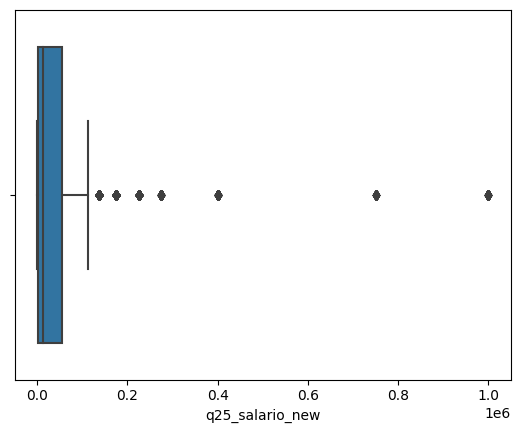

In [62]:
sns.boxplot(data = df , x="q25_salario_new" );

In [63]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_limpia',
       'salario1', 'salario2', 'q25_salario_new'],
      dtype='object')

In [64]:
df.drop(columns= ['q25_salario_limpia', 'salario1', 'salario2'], axis=1, inplace= True)

In [65]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_new'],
      dtype='object')

Se propone realizar dos análisis sobre el salario. Uno con los rangos de salarios y otro convirténdo la variable en numérica. 
Los nulos de la variable q25_salario se rellenan con Unknown y en la numérica se conservan los nulos

In [66]:
df["q25_salario"].replace(np.nan , "Unknown" , inplace=True)

In [67]:
df_numericas = df.select_dtypes(include=np.number)

In [68]:
imputer = IterativeImputer (n_nearest_features= None , imputation_order= "ascending")
imputer.fit(df_numericas)
imputer.transform(df_numericas)
df_numericas_salario = pd.DataFrame(imputer.transform(df_numericas), columns= df_numericas.columns)

df_numericas_salario.stb.missing()

,missing,total,percent
q25_salario_new,0,25965,0.0


In [69]:
df.drop(columns="q25_salario_new", axis= 1, inplace=True)

In [70]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat'],
      dtype='object')

In [71]:
df_numericas_salario["q25_salario_new"].isnull().sum()

0

In [72]:
df_numericas_salario.shape

(25965, 1)

In [73]:
df.shape

(25965, 18)

In [74]:
df["q25_salario_new"] = df_numericas_salario["q25_salario_new"]

In [75]:
df["q25_salario_new"].isnull().sum()

8

In [76]:
print (df["q25_salario_new"]. mean ())
print (df["q25_salario_new"]. median ())
print (df["q25_salario_new"]. std ())

44063.89564922317
44098.50116966665
67736.8481815786


In [77]:
df["q25_salario_new"].fillna(df["q25_salario_new"].median(), inplace=True)

In [78]:
df.stb.missing()

,missing,total,percent
q33_bigdata_product,21309,25965,82.068169
q22_da_cia,9841,25965,37.901021
q21_tamanio_cia,9716,25965,37.419603
q20_i_actual,9642,25965,37.134604
q41_h_process_data,7477,25965,28.796457
q14_h_viz,2001,25965,7.706528
q11_tipo_plataforma,1251,25965,4.818024
q9_adi,1038,25965,3.997689
q8_l_recomendado,1032,25965,3.974581
q7_l_utilizados,1031,25965,3.970730


## Edad numérica

In [79]:
df['q1_edad'].unique()

array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object)

In [80]:
def limpia_edad(edad):
    patron = "(\d+|\d+)"
    try:
        return re.findall(patron, str(edad))
    except: 
        np.nan

In [81]:
df['q1_edad_limpia'] = df['q1_edad'].apply(limpia_edad)

In [82]:
df['q1_edad_limpia'].value_counts()

[25, 29]    4931
[18, 21]    4894
[22, 24]    4694
[30, 34]    3440
[35, 39]    2504
[40, 44]    1890
[45, 49]    1375
[50, 54]     964
[55, 59]     592
[60, 69]     553
[70]         128
Name: q1_edad_limpia, dtype: int64

In [83]:
df['edad1'] = df['q1_edad_limpia'].str.get(0)

In [84]:
df['edad1'].unique()

array(['50', '22', '45', '25', '18', '30', '40', '35', '70', '55', '60'],
      dtype=object)

In [85]:
df['edad1'] = df['edad1'].astype('Int64', errors = 'raise')

In [86]:
df['edad1'].unique()

<IntegerArray>
[50, 22, 45, 25, 18, 30, 40, 35, 70, 55, 60]
Length: 11, dtype: Int64

In [87]:
df['edad2'] = df['q1_edad_limpia'].str.get(1)

In [88]:
df['edad2'].unique()

array(['54', '24', '49', '29', '21', '34', '44', '39', nan, '59', '69'],
      dtype=object)

In [89]:
df['edad2'] = df['edad2'].astype('Int64', errors = 'raise')

In [90]:
df['edad2'].unique()

<IntegerArray>
[54, 24, 49, 29, 21, 34, 44, 39, <NA>, 59, 69]
Length: 11, dtype: Int64

In [91]:
df['q1_edad_limpia'] = df[['edad1', 'edad2']].mean(axis  = 1)

In [92]:
df['q1_edad_limpia'].value_counts()

27.0    4931
19.5    4894
23.0    4694
32.0    3440
37.0    2504
42.0    1890
47.0    1375
52.0     964
57.0     592
64.5     553
70.0     128
Name: q1_edad_limpia, dtype: int64

In [93]:
df.drop(columns=['edad1', 'edad2'], axis=1, inplace=True)

In [94]:
df.rename(columns={'q1_edad_limpia':"q1_edad_num"}, inplace=True)

## Experiencia numérica

In [95]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_new',
       'q1_edad_num'],
      dtype='object')

In [96]:
df['q6_exp_tech'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [97]:
df['q6_exp_num']= df['q6_exp_tech'].replace({'I have never written code':0}, regex=True)

In [98]:
df['q6_exp_num'].value_counts()

1-3 years      7873
< 1 years      5876
3-5 years      4061
5-10 years     3099
10-20 years    2165
20+ years      1860
0              1031
Name: q6_exp_num, dtype: int64

In [99]:
def limpia_exp(exp):
    patron = "(\d+|\d+)"
    try:
        return re.findall(patron, str(exp))
    except: 
        np.nan

In [100]:
df['q6_exp_num'] = (df['q6_exp_num'].apply(limpia_exp))

In [101]:
df['q6_exp_num'].value_counts()

[1, 3]      7873
[1]         5876
[3, 5]      4061
[5, 10]     3099
[10, 20]    2165
[20]        1860
[0]         1031
Name: q6_exp_num, dtype: int64

In [102]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_new',
       'q1_edad_num', 'q6_exp_num'],
      dtype='object')

In [103]:
df.drop(columns=['q6_exp_num'], inplace=True)

In [104]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_new',
       'q1_edad_num'],
      dtype='object')

## Limpieza nulos otras columnas

Limpieza q33.  'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia','q33_bigdata_product', 'q41_h_process_data.
Se decide reemplaar los nulos por "Unknown"

In [105]:
def reemplazar_unknown (lista_columnas_cat):
    for i in lista_columnas_cat:
        df[i].replace(np.nan , "Unknown" , inplace=True)
        print (i , df[i].isnull().sum())
    return df

In [106]:
lista_nulos_unknown = [ 'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia',
                        'q33_bigdata_product', 'q41_h_process_data']

In [107]:
reemplazar_unknown (lista_nulos_unknown)

q20_i_actual 0
q21_tamanio_cia 0
q22_da_cia 0
q33_bigdata_product 0
q41_h_process_data 0


,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q25_salario_cat,q25_salario_new,q1_edad_num
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",30.000,27499.50000,52.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,100.000,64999.50000,52.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Academics/Education,"1000-9,999 employees",0,$0-999,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,15.000,499.50000,23.0
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,"1000-9,999 employees",0,"30,000-39,999",Unknown,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,60.000,34999.50000,47.0
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,50-249 employees,5-9,"30,000-39,999",Unknown,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2",60.000,34999.50000,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Computers/Technology,"10,000 or more employees",20+,"15,000-19,999",MongoDB,"Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn",30.000,44098.50117,32.0
25969,22-24,Man,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Python,PyCharm,None,Unknown,44098.50117,23.0
25970,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,Academics/Education,"1000-9,999 employees",20+,$0-999,Unknown,"Basic statistical software (Microsoft Excel, G...",NaN,NaN,NaN,15.000,44098.50117,52.0
25971,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,Online Service/Internet-based Services,"10,000 or more employees",20+,Unknown,Unknown,Unknown,"Python, SQL","Notepad++,Jupyter Notebook","Matplotlib ,Seaborn",Unknown,44098.50117,47.0


Se decide reemplazar las columnas: 'q7_l_utilizados', 'q8_l_recomendado', 'q9_adi', 'q11_tipo_plataforma', 'q14_h_viz' por la moda.

In [108]:
def reemplazar_moda (lista_columnas_mode):

    for i in lista_columnas_mode:
        imputer = SimpleImputer(strategy="most_frequent", missing_values= np.nan)
        imputer = imputer.fit(df[[i]])
        df[i] = imputer.transform(df[[i]])

        print (i , df[i].isnull().sum())
        
    return df

In [109]:
lista_nulos_moda = ['q7_l_utilizados', 'q8_l_recomendado', 'q9_adi', 'q11_tipo_plataforma', 'q14_h_viz']

In [110]:
reemplazar_moda(lista_nulos_moda)

q7_l_utilizados 0
q8_l_recomendado 0
q9_adi 0
q11_tipo_plataforma 0
q14_h_viz 0


,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q25_salario_cat,q25_salario_new,q1_edad_num
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",30.000,27499.50000,52.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,100.000,64999.50000,52.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,Academics/Education,"1000-9,999 employees",0,$0-999,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,15.000,499.50000,23.0
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,"1000-9,999 employees",0,"30,000-39,999",Unknown,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",Matplotlib,60.000,34999.50000,47.0
4,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Academics/Education,50-249 employees,5-9,"30,000-39,999",Unknown,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2",60.000,34999.50000,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,Computers/Technology,"10,000 or more employees",20+,"15,000-19,999",MongoDB,"Business intelligence software (Salesforce, Ta...","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn",30.000,44098.50117,32.0
25969,22-24,Man,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Python,PyCharm,None,Unknown,44098.50117,23.0
25970,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,Python,A laptop,Academics/Education,"1000-9,999 employees",20+,$0-999,Unknown,"Basic statistical software (Microsoft Excel, G...",Python,Jupyter Notebook,"Matplotlib ,Seaborn",15.000,44098.50117,52.0
25971,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,Online Service/Internet-based Services,"10,000 or more employees",20+,Unknown,Unknown,Unknown,"Python, SQL","Notepad++,Jupyter Notebook","Matplotlib ,Seaborn",Unknown,44098.50117,47.0


In [111]:
df.stb.missing()

,missing,total,percent
q1_edad,0,25965,0.0
q2_genero,0,25965,0.0
q25_salario_new,0,25965,0.0
q25_salario_cat,0,25965,0.0
q14_h_viz,0,25965,0.0
q9_adi,0,25965,0.0
q7_l_utilizados,0,25965,0.0
q41_h_process_data,0,25965,0.0
q33_bigdata_product,0,25965,0.0
q25_salario,0,25965,0.0


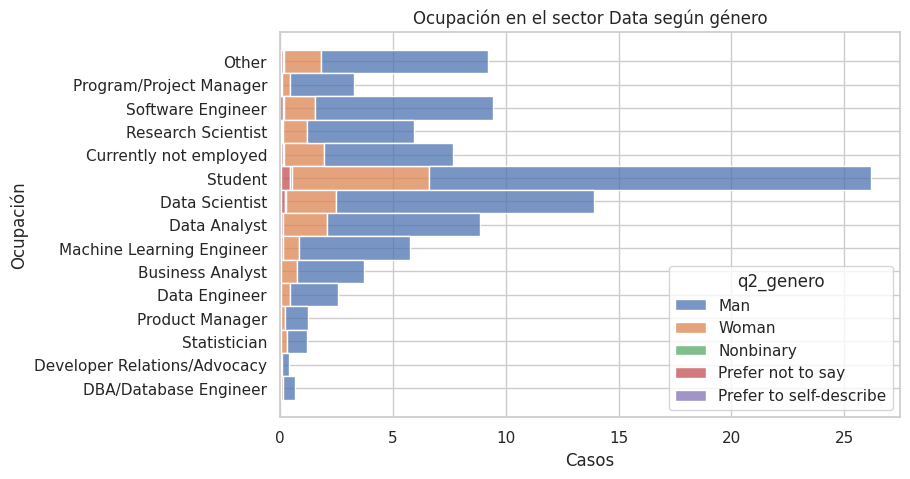

In [112]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.histplot(y= "q5_ocupacion",  
            data=df, 
            hue="q2_genero",
            stat="percent", 
            multiple="stack")
plt.title('Ocupación en el sector Data según género')
plt.xlabel('Casos') # definir el nombre del eje X
plt.ylabel('Ocupación'); # definir el nombre del eje Y

plt.show();

### Creación de agrupaciones para la visualización

In [113]:
df['q1_edad_new'] = df['q1_edad'].replace({
                            '50-54': '50-59',
                            '22-24': '22-29',
                            '25-29': '22-29',
                            '18-21': '<22',
                            '30-34': '30-39',
                            '40-44': '40-49',
                            '45-49' : '40-49',
                            '35-39': '30-39',
                            '70+':'70+',
                            '55-59': '50-59',
                            '60-69':'60-69'})

In [114]:
df['q2_genero_new'] = df['q2_genero'].replace({
                                    'Man': 'Man', 
                                    'Woman': 'Woman', 
                                    'Prefer to self-describe': 'Others', 
                                    'Nonbinary': 'Others', 
                                    'Prefer not to say': 'Others'})

In [115]:
df['q3_pais_new'] = df['q3_pais'].replace({
                    'India': 'India', 
                    'Indonesia':'Other', 
                    'Pakistan':'Pakistan', 
                    'Mexico':'Other', 
                    'Russia':'Russia', 
                    'Turkey':'Turkey',
                    'Australia':'Other',
                    'Nigeria':'Nigeria', 
                    'Greece':'Other', 
                    'Belgium':'Other', 
                    'Japan': 'Japan', 
                    'Egypt':'Other',
                    'Singapore':'Other', 
                    'Brazil':'Brazil', 
                    'Poland':'Other', 
                    'China':'Other',
                    'Iran, Islamic Republic of...':'Other',
                    'United States of America': 'USA',
                    'Italy':'Other',
                    'Viet Nam':'Other',
                    'Israel':'Other', 
                    'Peru':'Other',
                    'South Africa':'Other',
                    'Other':'Other',
                    'Spain':'Spain', 
                    'Bangladesh':'Other',
                    'United Kingdom of Great Britain and Northern Ireland':'Other', 
                    'France':'France',
                    'Switzerland':'Other', 
                    'Algeria':'Other', 
                    'Tunisia':'Other', 
                    'Argentina':'Other', 
                    'Sweden':'Other',
                    'Colombia':'Other', 
                    'I do not wish to disclose my location':'Other', 
                    'Canada':'Other',
                    'Chile':'Other', 
                    'Netherlands':'Other', 
                    'Ukraine':'Other', 
                    'Saudi Arabia':'Other', 
                    'Romania':'Other',
                    'Morocco':'Other', 
                    'Austria':'Other', 
                    'Taiwan':'Other', 
                    'Kenya':'Other', 
                    'Belarus':'Other', 
                    'Ireland':'Other',
                    'Portugal':'Other', 
                    'Hong Kong (S.A.R.)':'Other', 
                    'Denmark':'Other', 
                    'Germany':'Other',
                    'South Korea':'Other', 
                    'Philippines':'Other', 
                    'Sri Lanka':'Other', 
                    'United Arab Emirates':'Other',
                    'Uganda':'Other', 
                    'Ghana':'Other', 
                    'Malaysia':'Other', 
                    'Thailand':'Other', 
                    'Nepal':'Other', 
                    'Kazakhstan':'Other',
                    'Ethiopia':'Other', 
                    'Iraq':'Other', 
                    'Ecuador':'Other', 
                    'Norway':'Other', 
                    'Czech Republic':'Other'}) 

In [116]:
df['q4_educacion_new'] = df['q4_educacion'].replace({
                        'Master’s degree': 'Master’s degree', 
                        'Bachelor’s degree': 'Bachelor’s degree', 
                        'Doctoral degree': 'Doctoral degree',
                        'Professional doctorate': 'Professional doctorate',
                        'No formal education past high school': 'Others', 
                        'Some college/university study without earning a bachelor’s degree': 'Others', 
                        'I prefer not to answer': 'Others'}) 

In [117]:
df['q5_ocupacion_new'] = df['q5_ocupacion'].replace ({
                                    'Master’s degree': 'Master’s degree', 
                                    'Bachelor’s degree': 'Bachelor’s degree', 
                                    'Doctoral degree': 'Doctoral degree',
                                    'Professional doctorate': 'Professional doctorate',
                                    'No formal education past high school': 'Others', 
                                    'Some college/university study without earning a bachelor’s degree': 'Others', 
                                    'I prefer not to answer': 'Others'}) 

In [118]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q33_bigdata_product', 'q41_h_process_data', 'q7_l_utilizados',
       'q9_adi', 'q14_h_viz', 'q25_salario_cat', 'q25_salario_new',
       'q1_edad_num', 'q1_edad_new', 'q2_genero_new', 'q3_pais_new',
       'q4_educacion_new', 'q5_ocupacion_new'],
      dtype='object')

In [119]:
nuevo_orden = ['q1_edad' , 'q2_genero', 'q3_pais', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q7_l_utilizados','q8_l_recomendado', 'q9_adi', 'q11_tipo_plataforma', 'q14_h_viz',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario', 'q33_bigdata_product', 'q41_h_process_data',
       'q1_edad_num','q1_edad_new', 'q2_genero_new', 'q3_pais_new', 'q4_educacion_new', 'q5_ocupacion_new' , 'q25_salario_new', 'q25_salario_cat']

In [120]:
df= df.reindex(columns=nuevo_orden)

In [121]:
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,India,Bachelor’s degree,Other,27499.5,30.000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,64999.5,100.000


### Guardamos el archivo limpio

In [122]:
df.head(2)

,q1_edad,q2_genero,q3_pais,q4_educacion,q5_ocupacion,q6_exp_tech,q7_l_utilizados,q8_l_recomendado,q9_adi,q11_tipo_plataforma,q14_h_viz,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q33_bigdata_product,q41_h_process_data,q1_edad_num,q1_edad_new,q2_genero_new,q3_pais_new,q4_educacion_new,q5_ocupacion_new,q25_salario_new,q25_salario_cat
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,Vim / Emacs,A laptop,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",Unknown,"Local development environments (RStudio, Jupyt...",52.0,50-59,Man,India,Bachelor’s degree,Other,27499.5,30.000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Python,"Notepad++,Jupyter Notebook","A cloud computing platform (AWS, Azure, GCP, h...",Matplotlib,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",Unknown,"Advanced statistical software (SPSS, SAS, etc.)",52.0,50-59,Man,Other,Master’s degree,Program/Project Manager,64999.5,100.000


In [123]:
df.stb.missing()

,missing,total,percent
q1_edad,0,25965,0.0
q22_da_cia,0,25965,0.0
q25_salario_new,0,25965,0.0
q5_ocupacion_new,0,25965,0.0
q4_educacion_new,0,25965,0.0
q3_pais_new,0,25965,0.0
q2_genero_new,0,25965,0.0
q1_edad_new,0,25965,0.0
q1_edad_num,0,25965,0.0
q41_h_process_data,0,25965,0.0


In [124]:
df.to_csv("../data/8.dataframe_limpio.csv")